匯入程式庫 Import Libraries

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

圖片處理 Process Image

In [9]:
def process(img):
    return np.asarray(img.convert("L"))

In [10]:
def fft(img):
    img_fft = np.fft.fftshift(np.fft.fft2(img))

    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2

    mask = np.zeros((rows, cols), np.uint8)
    mask[crow-30:crow+30, ccol-30:ccol+30] = 1

    mask = 1 - mask

    img_fft = img_fft * mask
    img_ifft = np.fft.ifft2(img_fft)

    img_enhanced = Image.fromarray(np.abs(img_ifft)).convert("L")
    return img, img_enhanced

展示圖片 Display Image

In [11]:
def display_img(img1, img2):
    fig, ax = plt.subplots(1, 2, figsize=(10, 10))
    ax[0].imshow(img1, cmap="gray")
    ax[0].set_title("Original Image")
    ax[1].imshow(img2, cmap="gray")
    ax[1].set_title("Enhanced Image")

主程序 Main Process

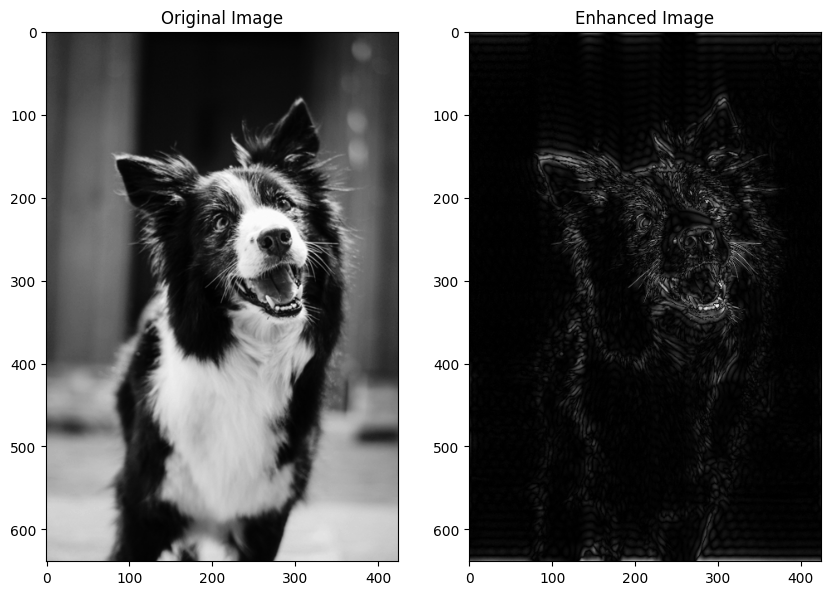

In [12]:
def main():
    filename = "./input.png"
    img = Image.open(filename)
    
    img, img_enhanced = fft(process(img))
    display_img(img, img_enhanced)

if __name__ == "__main__":
    main()